<a href="https://colab.research.google.com/github/jumanajouhar/naivebayes/blob/main/NaiveBayesonIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [102]:
%matplotlib inline

In [103]:
# Load the IRIS dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [104]:
# Add target column to the dataframe
df['target'] = data.target

In [105]:
# Map target numbers to flower species names
df['Name_type'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [106]:
# Split data into features (X) and target (y)
X = df[data.feature_names].values
y = df['target'].values

In [107]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [108]:
# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [109]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [110]:
# METRICS: Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
Accuracy Score: 1.0


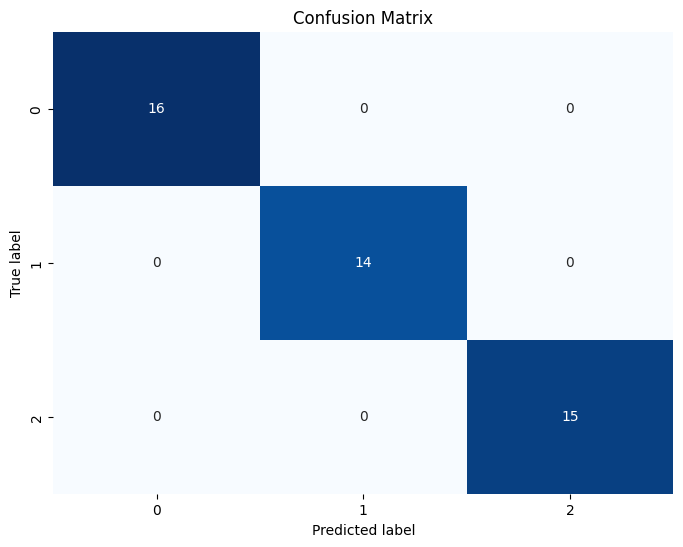

In [111]:
import seaborn as sns  # Import seaborn for enhanced visualization

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)  # 'annot=True' adds values
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()